# ___Text Similarity___

## ___What is Text Similarity?___
_Text similarity has to determine how ‘close’ two pieces of text are both in surface closeness __lexical similarity__ and meaning __semantic similarity__._

_For instance, how similar are the phrases __“the cat ate the mouse”__ with __“the mouse ate the cat food”__ by just looking at the words?_

* _On the surface, if you consider only word level similarity, these two phrases appear very similar as 3 of the 4 unique words are an exact overlap. It typically does not take into account the actual meaning behind words or the entire phrase in context._


* _Instead of doing a word for word comparison, we also need to pay attention to context in order to capture more of the semantics. To consider semantic similarity we need to focus on phrase/paragraph levels (or lexical chain level) where a piece of text is broken into a relevant group of related words prior to computing similarity. We know that while the words significantly overlap, these two phrases actually have different meaning._

_The big idea is that you __represent documents as vectors of features, and compare documents by measuring the distance between these features__. There are multiple ways to compute features that capture the semantics of documents and multiple algorithms to capture dependency structure of documents to focus on meanings of documents._

## ___Jaccard Similarity___

_Jaccard similarity or intersection over union is defined as __size of intersection divided by size of union of two sets__. Let’s take example of two sentences:_

___Sentence 1___ _: AI is our friend and it has been friendly_

___Sentence 2___ _: AI and humans have always been friendly_

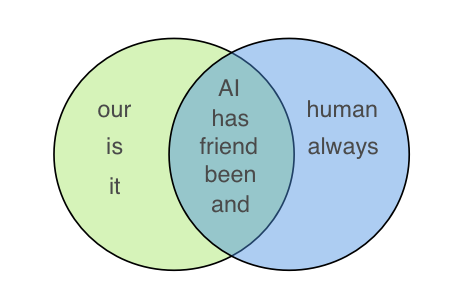

_In order to calculate similarity using Jaccard similarity, we will first perform lemmatization to reduce words to the same root word. In our case, “friend” and “friendly” will both become “friend”, “has” and “have” will both become “has”._

In [1]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)

_For the above two sentences, we get Jaccard similarity of 5/(5+3+2) = 0.5 which is size of intersection of the set divided by total size of set._

_Let’s take another example of two sentences having a similar meaning:_

___Sentence 1___ _: President greets the press in Chicago_

___Sentence 2___ _: Obama speaks in Illinois_

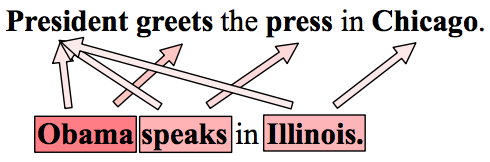

### ___Why Jaccard Similarity is not efficient?___

_My 2 sentences have no common words and will have a Jaccard score of 0. This is a terrible distance score because the 2 sentences have very similar meanings. Here Jaccard similarity is neither able to capture __semantic similarity__ nor __lexical semantic___ of these two sentences._

_Moreover, this approach has an inherent flaw. __That is, as the size of the document increases, the number of common words tend to increase even if the documents talk about different topics__._

## ___Cosine Similarity___

_Cosine similarity calculates similarity by __measuring the cosine of angle between two vectors__._

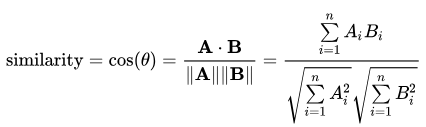

_Mathematically speaking, Cosine similarity is a __measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them__. The __cosine of 0° is 1__, and it is less than 1 for any angle in the interval (0,π] radians. __It is thus a judgment of orientation and not magnitude__: __two vectors with the same orientation have a cosine similarity of 1, two vectors oriented at 90° relative to each other have a similarity of 0, and two vectors diametrically opposed have a similarity of -1, independent of their magnitude__._

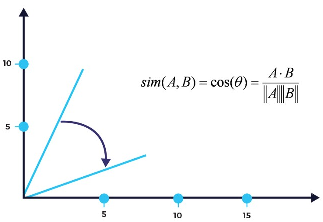

_The cosine similarity is advantageous because even if the two similar documents are far apart by the __Euclidean distance__ (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity._

_With cosine similarity, we need to convert sentences into vectors. One way to do that is to use bag of words with either TF (term frequency) or TF-IDF (term frequency- inverse document frequency). The choice of TF or TF-IDF depends on application and is immaterial to how cosine similarity is actually performed — which just needs vectors. TF is good for text similarity in general, but TF-IDF is good for search query relevance._

_Another way is to use Word2Vec or our own custom word embeddings to convert words into vectors._

_There are two main difference between TF-IDF with bag of words and word embeddings:_
1. _TF-IDF creates one number per word, word embeddings typically creates one vector per word._
2. _TF-IDF is good for classification documents as a whole, but word embeddings is good for identifying contextual content._

In [2]:
# Define the documents
doc_trump = "Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin"
doc_election = "President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election"
doc_putin = "Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career"

documents = [doc_trump, doc_election, doc_putin]

In [3]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['doc_trump', 'doc_election', 'doc_putin'])
df

,after,as,became,by,career,claimed,do,earlier,election,elections,...,the,though,to,trump,vladimir,was,who,winning,witchhunt,with
doc_trump,1,0,1,0,0,0,0,0,1,0,...,2,1,0,2,0,0,0,1,0,1
doc_election,0,0,0,1,0,1,1,0,2,0,...,2,0,1,1,0,1,1,0,1,1
doc_putin,0,1,1,0,1,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0


In [4]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df, df))

[[1.         0.51480485 0.38890873]
 [0.51480485 1.         0.38829014]
 [0.38890873 0.38829014 1.        ]]


### ___Soft Cosine Similarity___

_Suppose if you have another set of documents on a completely different topic, say ‘food’, you want a similarity metric that gives higher scores for documents belonging to the same topic and lower scores when comparing docs from different topics._

_In such case, we need to consider the semantic meaning should be considered. That is, words similar in meaning should be treated as similar. For Example, ‘President’ vs ‘Prime minister’, ‘Food’ vs ‘Dish’, ‘Hi’ vs ‘Hello’ should be considered similar. For this, converting the words into respective word vectors, and then, computing the similarities can address this problem._

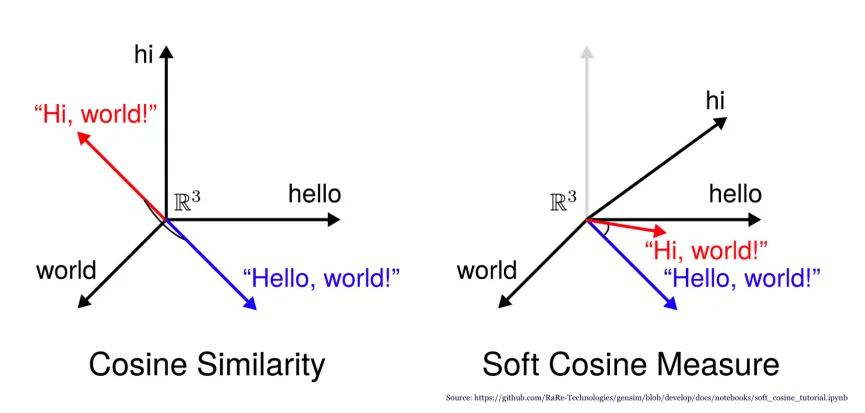

In [5]:
# Define the documents
doc_soup = "Soup is a primarily liquid food, generally served warm or hot (but may be cool or cold), that is made by combining ingredients of meat or vegetables with stock, juice, water, or another liquid. "
doc_noodles = "Noodles are a staple food in many cultures. They are made from unleavened dough which is stretched, extruded, or rolled flat and cut into one of a variety of shapes."
doc_dosa = "Dosa is a type of pancake from the Indian subcontinent, made from a fermented batter. It is somewhat similar to a crepe in appearance. Its main ingredients are rice and black gram."

documents = [doc_trump, doc_election, doc_putin, doc_soup, doc_noodles, doc_dosa]

In [6]:
import gensim
# upgrade gensim if you can't import softcossim
from gensim.matutils import softcossim 
from gensim import corpora
import gensim.downloader as api
from gensim.utils import simple_preprocess

print(gensim.__version__)

3.8.3


In [7]:
# Download the FastText model
fasttext_model300 = api.load('fasttext-wiki-news-subwords-300')

_To compute soft cosines, you need the dictionary (a map of word to unique id), the corpus (word counts) for each sentence and the similarity matrix._

In [8]:
# Prepare a dictionary and a corpus.
dictionary = corpora.Dictionary([simple_preprocess(doc) for doc in documents])

# Prepare the similarity matrix
similarity_matrix = fasttext_model300.similarity_matrix(dictionary, tfidf=None, threshold=0.0, exponent=2.0, nonzero_limit=100)

# Convert the sentences into bag-of-words vectors.
sent_1 = dictionary.doc2bow(simple_preprocess(doc_trump))
sent_2 = dictionary.doc2bow(simple_preprocess(doc_election))
sent_3 = dictionary.doc2bow(simple_preprocess(doc_putin))
sent_4 = dictionary.doc2bow(simple_preprocess(doc_soup))
sent_5 = dictionary.doc2bow(simple_preprocess(doc_noodles))
sent_6 = dictionary.doc2bow(simple_preprocess(doc_dosa))

sentences = [sent_1, sent_2, sent_3, sent_4, sent_5, sent_6]

_If you want the soft cosine similarity of 2 documents, you can just call the `softcossim()` function_

In [9]:
# Compute soft cosine similarity
print(softcossim(sent_1, sent_2, similarity_matrix))

0.5842470143211804


In [10]:
import numpy as np
import pandas as pd

def create_soft_cossim_matrix(sentences):
    len_array = np.arange(len(sentences))
    xx, yy = np.meshgrid(len_array, len_array)
    cossim_mat = pd.DataFrame([[round(softcossim(sentences[i],sentences[j], similarity_matrix) ,2) for i, j in zip(x,y)] for y, x in zip(xx, yy)])
    return cossim_mat

create_soft_cossim_matrix(sentences)

,0,1,2,3,4,5
0,1.00,0.58,0.56,0.28,0.34,0.40
1,0.58,1.00,0.54,0.25,0.31,0.43
2,0.56,0.54,1.00,0.19,0.25,0.36
3,0.28,0.25,0.19,1.00,0.50,0.38
4,0.34,0.31,0.25,0.50,1.00,0.56
5,0.40,0.43,0.36,0.38,0.56,1.00


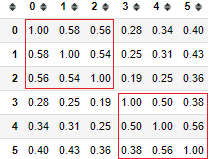

## ___Word Mover’s Distance___

_This uses the word embeddings of the words in two texts to measure the minimum distance that the words in one text need to “travel” in semantic space to reach the words in the other text._

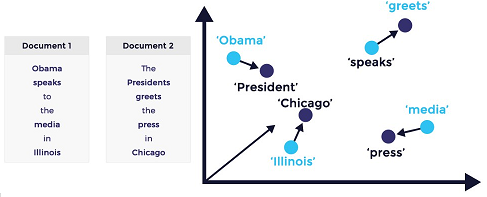

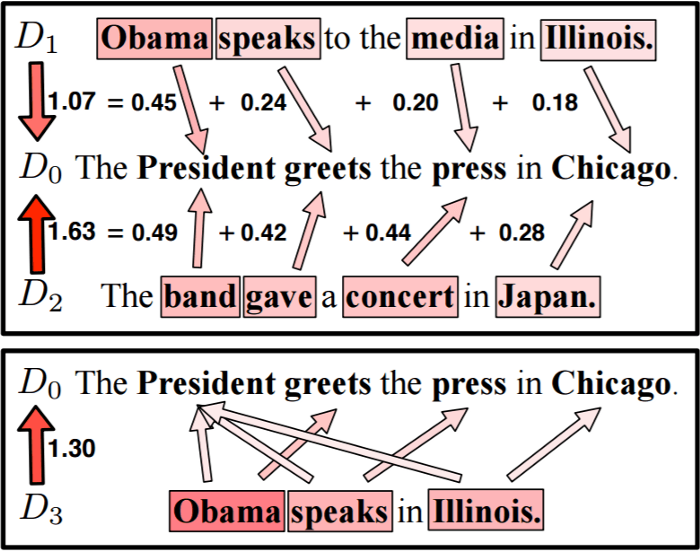

_The earth mover’s distance (EMD) is a measure of the distance between two probability distributions over a region D (known as the Wasserstein metric). Informally, if the distributions are interpreted as two different ways of piling up a certain amount of dirt over the region D, the EMD is the minimum cost of turning one pile into the other; where the cost is assumed to be amount of dirt moved times the distance by which it is moved._

In [11]:
sentence_obama = 'Obama speaks to the media in Illinois'
sentence_president = 'The president greets the press in Chicago'
sentence_obama = sentence_obama.lower().split()
sentence_president = sentence_president.lower().split()

In [12]:
# Import and download stopwords from NLTK.
from nltk.corpus import stopwords
from nltk import download
download('stopwords')  # Download stopwords list.

# Remove stopwords.
stop_words = stopwords.words('english')
sentence_obama = [w for w in sentence_obama if w not in stop_words]
sentence_president = [w for w in sentence_president if w not in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PiyushSin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# from gensim.models import Word2Vec

# model = Word2Vec.load_word2vec_format('/data/w2v_googlenews/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [14]:
# distance = model.wmdistance(sentence_obama, sentence_president)
# print ('distance = %.4f' % distance)

## ___Euclidean Distance___

___Euclidean Distance___ _between two points is the length of the path connecting them. The Pythagorean theorem gives this distance between two points. If the length of the sentence is increased between two sentences then by the euclidean distance they are different even though they have the same meaning._

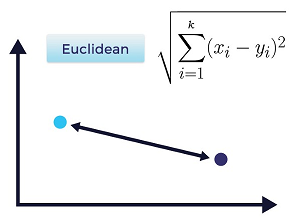

___Case 1: When Cosine Similarity is better than Euclidean distance___

_Let’s assume OA, OB and OC are three vectors as illustrated in the figure 1. The points A, B and C form an equilateral triangle. This means that the Euclidean distance of these points are same (AB = BC = CA). In this case, the Euclidean distance will not be effective in deciding which of the three vectors are similar to each other. Although the magnitude (length) of the vectors are different, Cosine similarity measure shows that OA is more similar to OB than to OC._

In [15]:
#Python code for Case 1: Where Cosine similarity measure is better than Euclidean distance
from scipy.spatial import distance

# The points below have been selected to demonstrate the case for Cosine similarity
O = [0.00, 0.00]
A = [1.45, 7.56]
B = [7.81, 12.41]
C = [8.83, 4.48]

#Cosine similarity
cos_simA_B = 1 - distance.cosine(A, B)
cos_simB_C = 1 - distance.cosine(B, C)
cos_simA_C = 1 - distance.cosine(A, C)

#Measuring Euclidean distances
euc_dstA_B = distance.euclidean(A,B)
euc_dstB_C = distance.euclidean(B,C)
euc_dstA_C = distance.euclidean(C,A)

print('Cosine Distance')
print(cos_simA_B)
print(cos_simB_C)
print(cos_simA_C)

print('\nEuclidean Distance')
print(euc_dstA_B)
print(euc_dstB_C)
print(euc_dstA_C)

Cosine Distance
0.9315258342391336
0.8579300679601176
0.6123399158783746

Euclidean Distance
7.998256059917061
7.995329886877713
7.996924408796171


_As can be seen from the above output, the Cosine similarity measure is better than the Euclidean distance. Cosine similarity measure suggests that OA and OB are closer to each other than OA to OC._

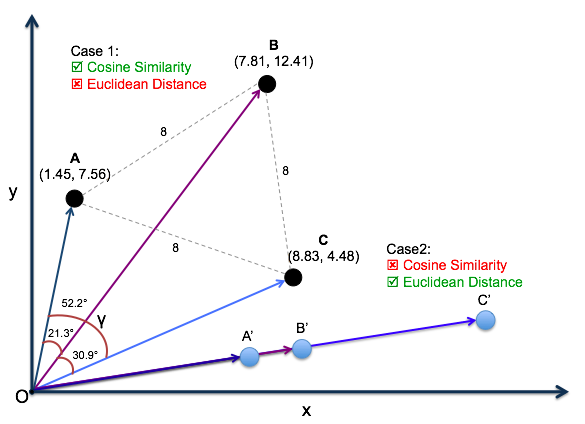

___Case 2: When Euclidean distance is better than Cosine similarity___

_Consider another case where the points A’, B’ and C’ are collinear as illustrated in the figure 1. In this case, Cosine similarity of all the three vectors (OA’, OB’ and OC’) are same (equals to 1). However, the Euclidean distance measure will be more effective and it indicates that A’ is more closer (similar) to B’ than C’._

In [16]:
#Python code for Case 2: Euclidean distance is better than Cosine similarity
A_ = [8.00, 2.00]
B_ = [12.00, 3.00]
C_ = [32.00, 8.00]

#Cosine similarity
cos_simA_B_ = 1 - distance.cosine(A_, B_)
cos_simB_C_ = 1 - distance.cosine(B_, C_)
cos_simA_C_ = 1 - distance.cosine(A_, C_)

#Euclidean distance
dstA_B_ = distance.euclidean(A_,B_)
dstB_C_ = distance.euclidean(B_,C_)
dstA_C_ = distance.euclidean(C_,A_)

print('Cosine Distance')
print(cos_simA_B_)
print(cos_simB_C_)
print(cos_simA_C_)

print('\nEuclidean Distance')
print(dstA_B_)
print(dstB_C_)
print(dstA_C_)

Cosine Distance
1.0
1.0
1.0

Euclidean Distance
4.123105625617661
20.615528128088304
24.73863375370596


_As can be seen from the above output, the Cosine similarity measure was same but the Euclidean distance suggests points A and B are closer to each other and hence similar to each other._

### ___Calculating Article Similarity___

In [17]:
q1 = "Machine Learning (ML) is the study of Computer algorithms improve automatically through experience.[1][2] It is seen as a subset of artificial intelligence. Machine learning algorithms build a mathematical model based on sample data, known as 'training data', in order to make predictions or decisions without being explicitly programmed to do so.[3] Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. Machine learning is closely related to computational statistics, which focuses on making predictions using computers. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.[5][6] In its application across business problems, machine learning is also referred to as predictive analytics."
q2 = "Artificial intelligence (AI), sometimes called machine intelligence, is intelligence demonstrated by machines, unlike the natural intelligence displayed by humans and animals. Leading AI textbooks define the field as the study of 'intelligent agents': any device that perceives its environment and takes actions that maximize its chance of successfully achieving its goals.[1] Colloquially, the term 'artificial intelligence' is often used to describe machines (or computers) that mimic 'cognitive' functions that humans associate with the human mind, such as 'learning' and 'problem solving'.[2] As machines become increasingly capable, tasks considered to require 'intelligence' are often removed from the definition of AI, a phenomenon known as the AI effect.[3] A quip in Tesler's Theorem says 'AI is whatever hasn't been done yet.'[4] For instance, optical character recognition is frequently excluded from things considered to be AI,[5] having become a routine technology.[6] Modern machine capabilities generally classified as AI include successfully understanding human speech,[7] competing at the highest level in strategic game systems (such as chess and Go),[8] autonomously operating cars, intelligent routing in content delivery networks, and military simulations.[9]"
q3 = "Association football, more commonly known as football or soccer,[a] is a team sport played with a spherical ball between two teams of 11 players. It is played by approximately 250 million players in over 200 countries and dependencies, making it the world's most popular sport. The game is played on a rectangular field called a pitch with a goal at each end. The object of the game is to outscore the opposition by moving the ball beyond the goal line into the opposing goal. The team with the higher number of goals wins the game. Football is played in accordance with a set of rules known as the Laws of the Game. The ball is 68–70 cm (27–28 in) in circumference and known as the football. The two teams each compete to get the ball into the other team's goal (between the posts and under the bar), thereby scoring a goal. The team that has scored more goals at the end of the game is the winner; if both teams have scored an equal number of goals then the game is a draw. Each team is led by a captain who has only one official responsibility as mandated by the Laws of the Game: to represent their team in the coin toss prior to kick-off or penalty kicks.[5]"
q4 = "Tennis is a racket sport that can be played individually against a single opponent (singles) or between two teams of two players each (doubles). Each player uses a tennis racket that is strung with cord to strike a hollow rubber ball covered with felt over or around a net and into the opponent's court. The object of the game is to maneuver the ball in such a way that the opponent is not able to play a valid return. The player who is unable to return the ball will not gain a point, while the opposite player will. Tennis is an Olympic sport and is played at all levels of society and at all ages. The sport can be played by anyone who can hold a racket, including wheelchair users. The modern game of tennis originated in Birmingham, England, in the late 19th century as lawn tennis.[1] It had close connections both to various field (lawn) games such as croquet and bowls as well as to the older racket sport today called real tennis. During most of the 19th century, in fact, the term tennis referred to real tennis, not lawn tennis.The rules of modern tennis have changed little since the 1890s. Two exceptions are that from 1908 to 1961 the server had to keep one foot on the ground at all times, and the adoption of the tiebreak in the 1970s. A recent addition to professional tennis has been the adoption of electronic review technology coupled with a point-challenge system, which allows a player to contest the line call of a point, a system known as Hawk-Eye."

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = np.array(cv.fit_transform([q1, q2, q3, q4]).todense())

In [19]:
print("ML \t", len(q1.split()), "\n"
      "AI \t", len(q2.split()), "\n"
      "soccer \t", len(q3.split()), "\n"
      "tennis \t", len(q4.split()))

ML 	 147 
AI 	 176 
soccer 	 218 
tennis 	 268


In [20]:
print("ML - AI \t", distance.euclidean(X[0], X[1]), "\n"
      "ML - soccer \t", distance.euclidean(X[0], X[2]), "\n"
      "ML - tennis \t", distance.euclidean(X[0], X[3]))

ML - AI 	 21.633307652783937 
ML - soccer 	 34.07345007480164 
ML - tennis 	 32.4037034920393


In [21]:
print("ML - AI \t", distance.cosine(X[0], X[1]), "\n"
      "ML - soccer \t", distance.cosine(X[0], X[2]), "\n"
      "ML - tennis \t", distance.cosine(X[0], X[3]))

ML - AI 	 0.5622862203634944 
ML - soccer 	 0.5986970948408386 
ML - tennis 	 0.5483972464173761


_ML is closer to AI! Granted, it still seems pretty close to soccer an tennis judging from these scores, but please note that word frequency is not that great of a representation for texts with such rich content._

## ___Similarity using spaCy___

In [22]:
import spacy 
nlp = spacy.load('en_core_web_md') 
  
print("Enter two space-separated words") 
words = input() 
  
tokens = nlp(words) 
  
for token in tokens: 
    # Printing the following attributes of each token. 
    # text: the word string, has_vector: if it contains 
    # a vector representation in the model,  
    # vector_norm: the algebraic norm of the vector, 
    # is_oov: if the word is out of vocabulary. 
    print(token.text, token.has_vector, token.vector_norm, token.is_oov) 

token1, token2 = tokens[0], tokens[1] 
  
print("Similarity:", token1.similarity(token2)) 

Enter two space-separated words
deep learning
deep True 6.4066195 False
learning True 6.542082 False
Similarity: 0.28186125


## ___Document Similarity___

_“Two documents are similar if their vectors are similar”._

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.display.max_colwidth=500

In [24]:
books = [
    "Natural Language Processing in Action: Understanding, analyzing, and generating text with Python",
    "Natural Language Processing with Python: Analyzing Text with the Natural Language Toolkit",
    "Neural Network Methods for Natural Language Processing (Synthesis Lectures on Human Language Technologies)",
    "Natural Language Processing with PyTorch: Build Intelligent Language Applications Using Deep Learning",
    "Applied Text Analysis with Python: Enabling Language-Aware Data Products with Machine Learning",
    "Natural Language Processing with TensorFlow: Teach language to machines using Python's deep learning library",
    "Speech and Language Processing, 2nd Edition",
    "Foundations of Statistical Natural Language Processing",
    "Natural Language Processing Fundamentals: Build intelligent applications that can interpret the human language to deliver impactful results",
    "Deep Learning for Natural Language Processing",
    "Natural Language Processing and Computational Linguistics: A practical guide to text analysis with Python, Gensim, spaCy, and Keras",
    "Hands-On Unsupervised Learning Using Python: How to Build Applied Machine Learning Solutions from Unlabeled Data",
    "The Handbook of Computational Linguistics and Natural Language Processing",
    "Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems",
    "Natural Language Processing Recipes: Unlocking Text Data with Machine Learning and Deep Learning using Python",
    "Deep Learning in Natural Language Processing",
    "Python Natural Language Processing: Advanced machine learning and deep learning techniques for natural language processing",
    "Natural Language Annotation for Machine Learning: A Guide to Corpus-Building for Applications",
    "Natural Language Processing: A Quick Introduction to NLP with Python and NLTK (Step-by-Step Tutorial for Beginners)",
    "Python Deep learning: Develop your first Neural Network in Python Using TensorFlow, Keras, and PyTorch (Step-by-Step Tutorial for Beginners)",
    "Deep Learning for Natural Language Processing: Creating Neural Networks with Python",
    "Introduction to Natural Language Processing (Adaptive Computation and Machine Learning series)",
    "Deep Learning for Natural Language Processing: Solve your natural language processing problems with smart deep neural networks",
    "Biomedical Natural Language Processing"
]

num_books = len(books)
print("A total of " + str(num_books) + " books have been collected")

A total of 24 books have been collected


In [36]:
# label books as book_1, book_2 .. book_n
bookids = ["book_" + str(i) for i in range(num_books)]

# create a dictionary
book_dict = dict(zip(bookids, books))

# get all the book ids in a list
ids = list(book_dict.keys())

# create all possible pairs
pairs = []
# create a list of tuples
for i, v in enumerate(ids):
    for j in ids[i+1:]:
        pairs.append((ids[i], j))

print("There are a total of " + str(len(pairs)) + " pairs")
print("Displaying first 10 pairs: ")
display(pairs[:10])
print("....")
print("Displaying last 10 pairs: ")
display(pairs[-10:])

There are a total of 276 pairs
Displaying first 10 pairs: 


[('book_0', 'book_1'),
 ('book_0', 'book_2'),
 ('book_0', 'book_3'),
 ('book_0', 'book_4'),
 ('book_0', 'book_5'),
 ('book_0', 'book_6'),
 ('book_0', 'book_7'),
 ('book_0', 'book_8'),
 ('book_0', 'book_9'),
 ('book_0', 'book_10')]

....
Displaying last 10 pairs: 


[('book_19', 'book_20'),
 ('book_19', 'book_21'),
 ('book_19', 'book_22'),
 ('book_19', 'book_23'),
 ('book_20', 'book_21'),
 ('book_20', 'book_22'),
 ('book_20', 'book_23'),
 ('book_21', 'book_22'),
 ('book_21', 'book_23'),
 ('book_22', 'book_23')]

_The process for calculating cosine similarity can be summarized as follows:_

* _Normalize the corpus of documents._
* _Vectorize the corpus of documents._
* _Take a dot product of the pairs of documents._
* _Plot a heatmap to visualize the similarity._

In [37]:
import re
import pandas as pd
import numpy as np
import nltk
import string
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer

# tokenize text
def tokenize_text(book_text):
    TOKEN_PATTERN = r'\s+'
    regex_wt = nltk.RegexpTokenizer(pattern=TOKEN_PATTERN, gaps=True)
    word_tokens = regex_wt.tokenize(book_text)
    return word_tokens

def remove_characters_after_tokenization(tokens):
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub('', token) for token in tokens])
    return filtered_tokens

def convert_to_lowercase(tokens):
    return [token.lower() for token in tokens if token.isalpha()]

def remove_stopwords(tokens):
    stopword_list = nltk.corpus.stopwords.words('english')
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    return filtered_tokens

def apply_lemmatization(tokens, wnl=WordNetLemmatizer()):
    return [wnl.lemmatize(token) for token in tokens]

def cleanTextBooks(book_texts):
    clean_books = []
    for book in book_texts:
        book_i = tokenize_text(book)
        book_i = remove_characters_after_tokenization(book_i)
        book_i = convert_to_lowercase(book_i)
        book_i = remove_stopwords(book_i)
        book_i = apply_lemmatization(book_i)
        clean_books.append(book_i)
    return clean_books

In [44]:
# pip install normalization
from normalization import *

corpus = cleanTextBooks(books)

# convert list of lists into a list of strinpip install normalizations
norm_book_corpus = [' '.join(text) for text in corpus]

# display normalized corpus
display(norm_book_corpus)

['natural language processing action understanding analyzing generating text python',
 'natural language processing python analyzing text natural language toolkit',
 'neural network method natural language processing synthesis lecture human language technology',
 'natural language processing pytorch build intelligent language application using deep learning',
 'applied text analysis python enabling languageaware data product machine learning',
 'natural language processing tensorflow teach language machine using python deep learning library',
 'speech language processing edition',
 'foundation statistical natural language processing',
 'natural language processing fundamental build intelligent application interpret human language deliver impactful result',
 'deep learning natural language processing',
 'natural language processing computational linguistics practical guide text analysis python gensim spacy kera',
 'handson unsupervised learning using python build applied machine learnin

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,1))
vectorizer

TfidfVectorizer(min_df=0.0)

In [46]:
# calculate the feature matrix
feature_matrix = vectorizer.fit_transform(norm_book_corpus).astype(float)

# display the shape of feature matrix
display(feature_matrix.shape)

# display the first feature vector
display(feature_matrix[0])

# display the dense version of the feature vector
display(feature_matrix.toarray()[0])

# display the shape of dense feature vector
display(feature_matrix.toarray()[0].shape)

# display the first document text
display(norm_book_corpus[0])

(24, 82)

<1x82 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

array([0.4540467 , 0.        , 0.        , 0.        , 0.40183052,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.4540467 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.15123435, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.15751759,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.15751759, 0.        , 0.22330221, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.31256636, 0.     

(82,)

'natural language processing action understanding analyzing generating text python'

In [47]:
def compute_cosine_similarity(pair):

    # extract the indexes from the pair
    book1, book2 = pair

    # split on _ and get index
    book1_index = int(book1.split("_")[1])
    book2_index = int(book2.split("_")[1])

    # get the feature matrix of the document
    book1_fm = feature_matrix.toarray()[book1_index]
    book2_fm = feature_matrix.toarray()[book2_index]

    # compute cosine similarity manually
    manual_cosine_similarity = np.dot(book1_fm, book2_fm)
    return manual_cosine_similarity

pairwise_cosine_similarity = [compute_cosine_similarity(pair) for pair in pairs]

# create a dataframe
df = pd.DataFrame({'pair': pairs, 'similarity': pairwise_cosine_similarity})
display(df.head())
display(df.tail())

,pair,similarity
0,"(book_0, book_1)",0.502098
1,"(book_0, book_2)",0.081986
2,"(book_0, book_3)",0.101772
3,"(book_0, book_4)",0.128064
4,"(book_0, book_5)",0.145188


,pair,similarity
271,"(book_20, book_22)",0.551686
272,"(book_20, book_23)",0.169933
273,"(book_21, book_22)",0.156997
274,"(book_21, book_23)",0.140307
275,"(book_22, book_23)",0.230840


In [48]:
print("Most similar books are: ")
print(book_dict['book_9'])
print(" and ")
print(book_dict['book_15'])

Most similar books are: 
Deep Learning for Natural Language Processing
 and 
Deep Learning in Natural Language Processing


In [49]:
print("Most dissimilar books are: ")
print(book_dict['book_0'])
print(" and ")
print(book_dict['book_13'])

Most dissimilar books are: 
Natural Language Processing in Action: Understanding, analyzing, and generating text with Python
 and 
Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems


## ___Document Similarity to Query Document___

In [50]:
from nltk.tokenize import word_tokenize

data = "Mars is approximately half the diameter of Earth."
print(word_tokenize(data))

['Mars', 'is', 'approximately', 'half', 'the', 'diameter', 'of', 'Earth', '.']


In [51]:
from nltk.tokenize import sent_tokenize

data = "Mars is a cold desert world. It is half the size of Earth. "
print(sent_tokenize(data))

['Mars is a cold desert world.', 'It is half the size of Earth.']


In [52]:
file_docs = []

document_File = 'Ther ahve been a a lot of discovery being done on Mars for water, air and conditions favorable to human living. There have been many important studies regarding shape, size and closeness to sun. If this planet is found suitable for humans, we can expect humans traveling to this planet which is half the size of earth.'

# with open ('demofile.txt') as f:
tokens = sent_tokenize(document_File)
for line in tokens:
    file_docs.append(line)

print("Number of documents:",len(file_docs))

Number of documents: 3


In [54]:
gen_docs = [[w.lower() for w in word_tokenize(text)] 
            for text in file_docs]
gen_docs

[['ther',
  'ahve',
  'been',
  'a',
  'a',
  'lot',
  'of',
  'discovery',
  'being',
  'done',
  'on',
  'mars',
  'for',
  'water',
  ',',
  'air',
  'and',
  'conditions',
  'favorable',
  'to',
  'human',
  'living',
  '.'],
 ['there',
  'have',
  'been',
  'many',
  'important',
  'studies',
  'regarding',
  'shape',
  ',',
  'size',
  'and',
  'closeness',
  'to',
  'sun',
  '.'],
 ['if',
  'this',
  'planet',
  'is',
  'found',
  'suitable',
  'for',
  'humans',
  ',',
  'we',
  'can',
  'expect',
  'humans',
  'traveling',
  'to',
  'this',
  'planet',
  'which',
  'is',
  'half',
  'the',
  'size',
  'of',
  'earth',
  '.']]

In [55]:
dictionary = gensim.corpora.Dictionary(gen_docs)
print(dictionary.token2id)

{',': 0, '.': 1, 'a': 2, 'ahve': 3, 'air': 4, 'and': 5, 'been': 6, 'being': 7, 'conditions': 8, 'discovery': 9, 'done': 10, 'favorable': 11, 'for': 12, 'human': 13, 'living': 14, 'lot': 15, 'mars': 16, 'of': 17, 'on': 18, 'ther': 19, 'to': 20, 'water': 21, 'closeness': 22, 'have': 23, 'important': 24, 'many': 25, 'regarding': 26, 'shape': 27, 'size': 28, 'studies': 29, 'sun': 30, 'there': 31, 'can': 32, 'earth': 33, 'expect': 34, 'found': 35, 'half': 36, 'humans': 37, 'if': 38, 'is': 39, 'planet': 40, 'suitable': 41, 'the': 42, 'this': 43, 'traveling': 44, 'we': 45, 'which': 46}


In [57]:
corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]
corpus

[[(0, 1),
  (1, 1),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1)],
 [(0, 1),
  (1, 1),
  (5, 1),
  (6, 1),
  (20, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1)],
 [(0, 1),
  (1, 1),
  (12, 1),
  (17, 1),
  (20, 1),
  (28, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 2),
  (38, 1),
  (39, 2),
  (40, 2),
  (41, 1),
  (42, 1),
  (43, 2),
  (44, 1),
  (45, 1),
  (46, 1)]]

In [60]:
tfidf = gensim.models.TfidfModel(corpus)
for doc in tfidf[corpus]:
    print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in doc])

[['a', 0.46], ['ahve', 0.23], ['air', 0.23], ['and', 0.09], ['been', 0.09], ['being', 0.23], ['conditions', 0.23], ['discovery', 0.23], ['done', 0.23], ['favorable', 0.23], ['for', 0.09], ['human', 0.23], ['living', 0.23], ['lot', 0.23], ['mars', 0.23], ['of', 0.09], ['on', 0.23], ['ther', 0.23], ['water', 0.23]]
[['and', 0.12], ['been', 0.12], ['closeness', 0.33], ['have', 0.33], ['important', 0.33], ['many', 0.33], ['regarding', 0.33], ['shape', 0.33], ['size', 0.12], ['studies', 0.33], ['sun', 0.33], ['there', 0.33]]
[['for', 0.07], ['of', 0.07], ['size', 0.07], ['can', 0.19], ['earth', 0.19], ['expect', 0.19], ['found', 0.19], ['half', 0.19], ['humans', 0.38], ['if', 0.19], ['is', 0.38], ['planet', 0.38], ['suitable', 0.19], ['the', 0.19], ['this', 0.38], ['traveling', 0.19], ['we', 0.19], ['which', 0.19]]


In [66]:
# building the index
sims = gensim.similarities.Similarity('',corpus = tfidf[corpus],
                                       num_features=len(dictionary))

In [62]:
file2_docs = []

doc_2 = "Mars is the fourth planet in our solar system. It is second-smallest planet in the Solar System after Mercury. Saturn is yellow planet."
# with open ('demofile2.txt') as f:

tokens = sent_tokenize(doc_2)
for line in tokens:
    file2_docs.append(line)

print("Number of documents:",len(file2_docs))  
for line in file2_docs:
    query_doc = [w.lower() for w in word_tokenize(line)]
    query_doc_bow = dictionary.doc2bow(query_doc)

Number of documents: 3


In [67]:
# perform a similarity query against the corpus
query_doc_tf_idf = tfidf[query_doc_bow]
# print(document_number, document_similarity)
print('Comparing Result:', sims[query_doc_tf_idf]) 

Comparing Result: [0.         0.         0.54025805]


_[Document Similarity using __Doc2vec__](https://analyticsindiamag.com/nlp-case-study-identify/)_

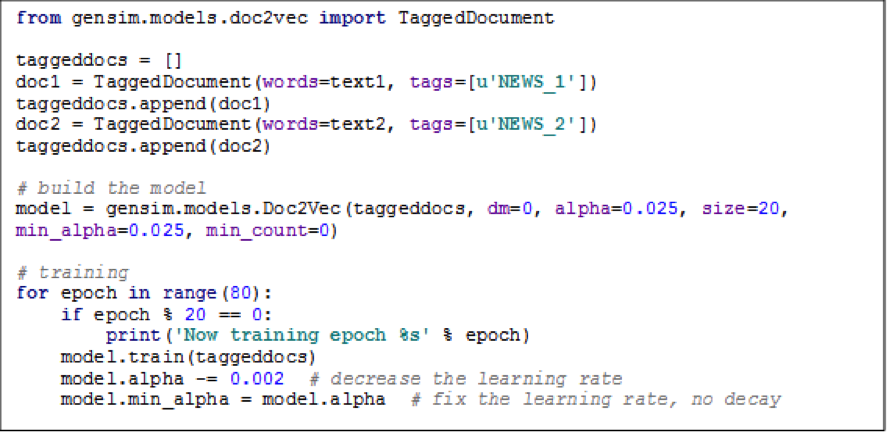

_[Reference](https://medium.com/@adriensieg/text-similarities-da019229c894)_